In [93]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

import seaborn as sns
from matplotlib.pyplot import figure, show
import matplotlib.style as style

from scipy import stats
# Any results you write to the current directory are saved as output.

style.use('seaborn-poster') #sets the size of the charts
style.use('fivethirtyeight')
# --- 

['WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [94]:
# load data
users = pd.read_csv("../input/WA_Fn-UseC_-Telco-Customer-Churn.csv")
users.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


36.122922303826826

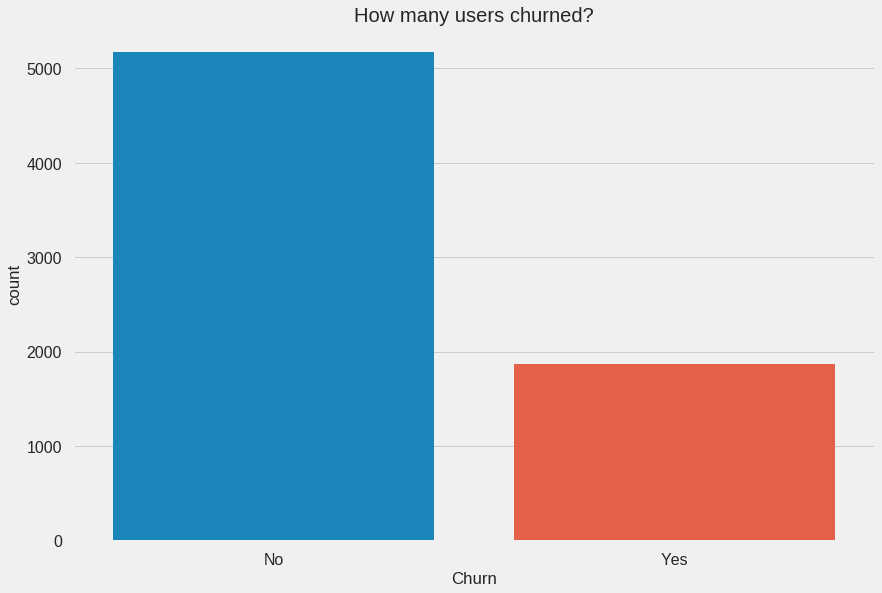

In [95]:
# let's look at the response variable, is it unbalanced?
sns.countplot(x = "Churn", data=users).set_title("How many users churned?")
# as expected it is unbalanced, not heavily
users.Churn[users.Churn=="Yes"].shape[0]/users.Churn[users.Churn=="No"].shape[0]*100 #36.12% has churned.

Text(0.5,1,'Relationship between gender and Churn')

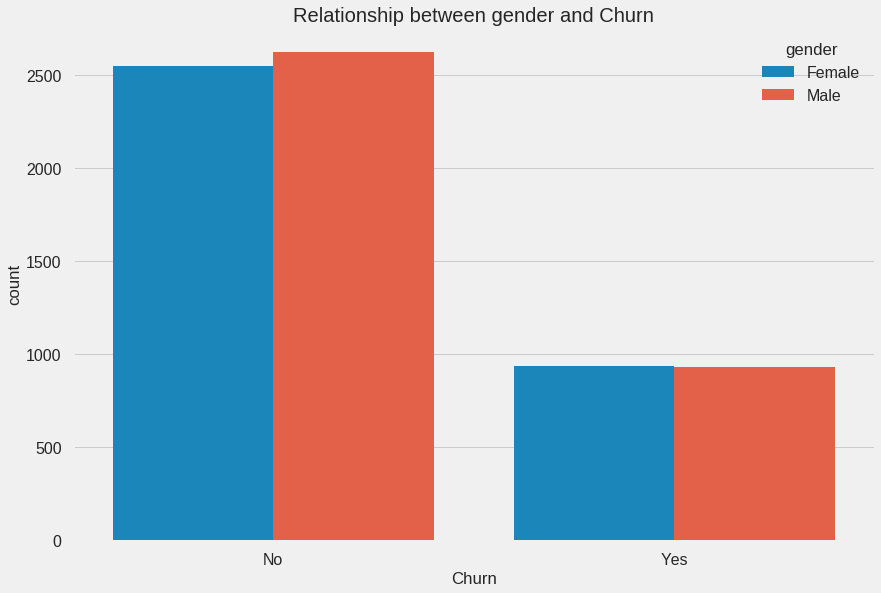

In [96]:
# gender vs churn, is there a relation?
sns.countplot(x="Churn", data=users, hue="gender").set_title("Relationship between gender and Churn")
# it seems that gender is not related with churn, otherwise I'd expect to see different ratios

In [97]:
# here a crosstab, I want to exclude with Chisq the possible relationship
cross_tab = pd.crosstab(users.Churn, users.gender)
print(cross_tab)

g, p, dof, expctd = stats.chi2_contingency(cross_tab)
print(g) # statistics value
print(p) # pvalue > 0.05 -> H0 is not rejected, we can say that there's no apparent relationship.

gender  Female  Male
Churn               
No        2549  2625
Yes        939   930
0.4840828822091383
0.48657873605618596


Text(0.5,1,'Types of Contract avaiable')

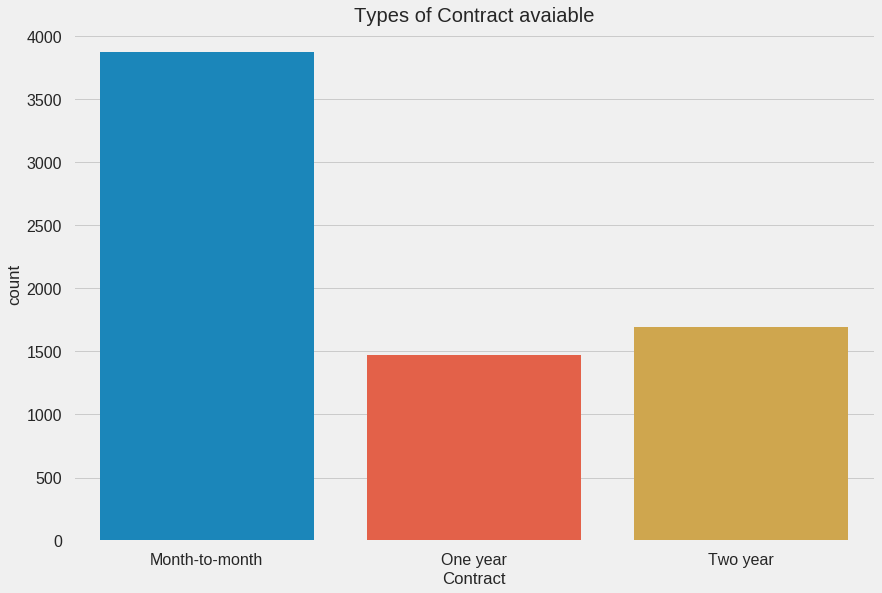

In [98]:
# which types of contract are avaiable? 
sns.countplot(x="Contract", data=users).set_title("Types of Contract avaiable")
# is there a relationship with Churn?

Contract  Month-to-month  One year  Two year
Churn                                       
No                  2220      1307      1647
Yes                 1655       166        48
1184.5965720837926
5.863038300673391e-258


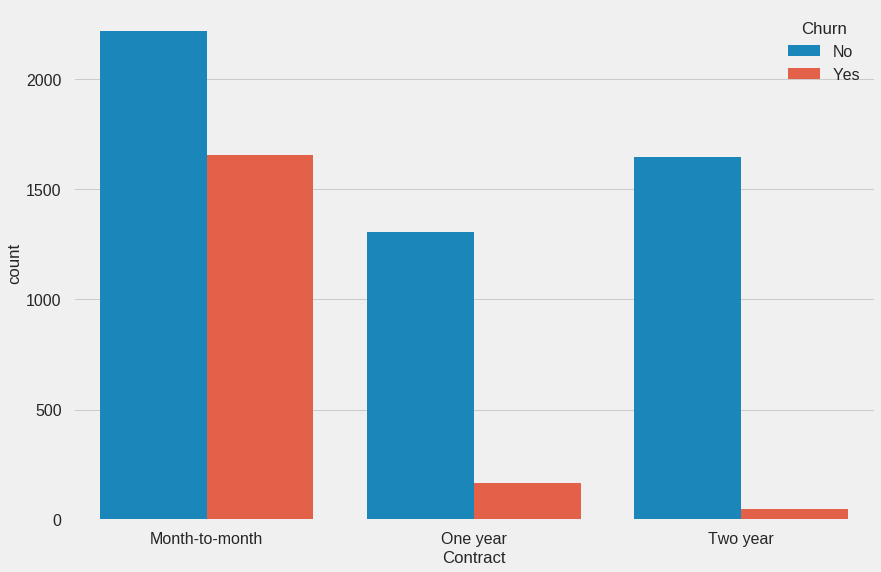

In [99]:
sns.countplot(x="Contract", data=users, hue="Churn")
# it seems that Churn is more probable with shorter Contracts, which is not that surprising.
cross_tab = pd.crosstab(users.Churn, users.Contract)
print(cross_tab)

g, p, dof, expctd = stats.chi2_contingency(cross_tab)
print(g)
print(p) # pvalue < 0.05 -> H0 is rejected, we can assume that in fact there's a relationship with Contract and Churn
#print(expctd)

Text(0.5,1,'PaymentMethod vs Churn')

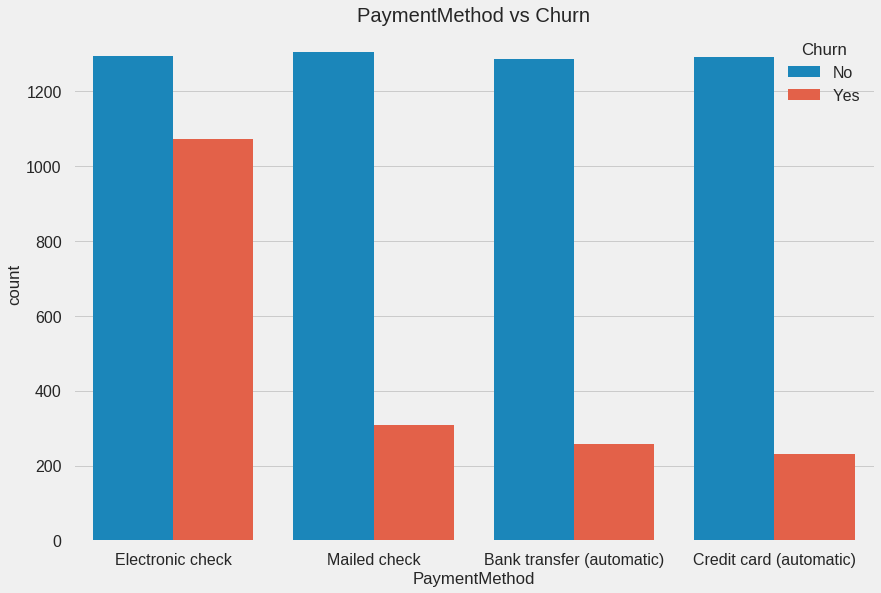

In [100]:
# compared to the PaymentMethod, how is the Churn rate?
sns.countplot(x="PaymentMethod", data=users, hue="Churn").set_title("PaymentMethod vs Churn")
# again we can see a different pattern based on PaymentMethod.

In [101]:
# we could get a new variable: TotalCharges/tenure
# this should help understand the relationship between amount payed by billing and Churn

# there seems to be somethin wrong with the TotalCharges columns, maybe it's just a wrong format problem.
#users.TotalCharges_num = pd.to_numeric(users.TotalCharges) # error

# looks like we have some empty value
#users[users.TotalCharges==" "] 
# for the moment I'll remove this values, because they seem either anomalous or non relevant, maybe
users_new = users[users.TotalCharges!=" "]

users_new["TotalCharges_num"] = pd.to_numeric(users_new.TotalCharges)
print(users_new.head())
#users["billed_bytenure"] = users.TotalCharges / users.tenure
#users.head()

   customerID  gender       ...         Churn TotalCharges_num
0  7590-VHVEG  Female       ...            No            29.85
1  5575-GNVDE    Male       ...            No          1889.50
2  3668-QPYBK    Male       ...           Yes           108.15
3  7795-CFOCW    Male       ...            No          1840.75
4  9237-HQITU  Female       ...           Yes           151.65

[5 rows x 22 columns]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [102]:
users_new["billed_bytenure"] = users_new.TotalCharges_num / users_new.tenure
users_new.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_num,billed_bytenure
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85,29.850000
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1889.50,55.573529
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,108.15,54.075000
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1840.75,40.905556
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,151.65,75.825000


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


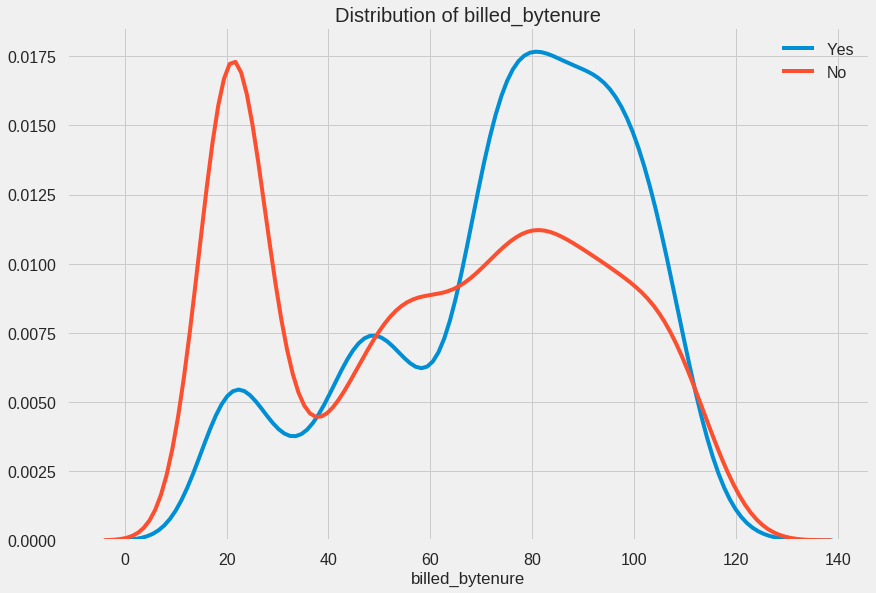

In [103]:
# lets make some plot
sns.distplot(users_new.billed_bytenure[users_new.Churn=="Yes"], hist=False, kde=True, label="Yes").set_title("Distribution of billed_bytenure")
sns.distplot(users_new.billed_bytenure[users_new.Churn=="No"], hist=False, kde=True, label="No")
# it seems that the distribution for those who churned tends to have a higher mode (higher costs), than for those users who haven't churned yet.